**Нейросеть на базе Keras**

Обучение с учителем

Прогнозирование 1 переменной, через разложение её временного ряда

# Импорт библиотек

In [1]:
import numpy as np
import pandas as pd

import pylab

import matplotlib.pyplot as plt

import math

import keras as k
from keras import layers
from tensorflow.keras.layers import Dense

import tensorflow as tf

from sklearn.model_selection import train_test_split

# Ввод статистики

In [2]:
# ------------ Источник ------------ #

df_url = "https://raw.githubusercontent.com/ForestTiger-GH/COTRA/main/Stat_wheat/WeekDynamicClassified_OPENINTEREST_0-9x3binary_all536.txt"

df_name = "Open Interest - vectorized"

df = pd.read_csv(df_url,
               sep='\t', 
               error_bad_lines=False,
               decimal=',',
               encoding='gbk', 
               skiprows=1)

In [3]:
len(df.columns)

32

In [4]:
# ------------ Параметры данных ------------ #

dates = df.iloc[:, 0:1]
df_X = df.iloc[:, 1:31]
df_Y = df.iloc[:, 31:32]               ###########

df_length = len(df)
df_width = len(df.columns)

In [5]:
X = df_X
Y = df_Y

In [6]:
step = 3

In [7]:
X = np.array(X.astype(np.int32)).tolist()
Y = np.array(Y.astype(np.int32))                  ###########

In [8]:
train_x = np.array(X)
train_y = Y

In [9]:
print(train_x[0])
print(train_y[0])

[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0]
[5]


# Обработка

17/17 [==============================] - 0s 1ms/step - loss: 1.8881 - accuracy: 0.0319
[1.888089656829834, 0.03189493343234062]


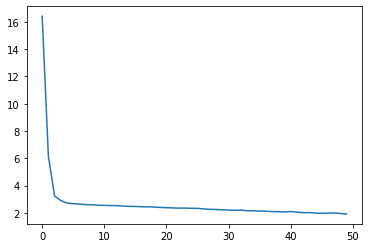

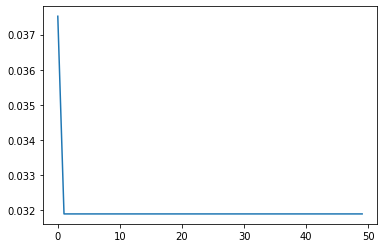

In [10]:
abc = []

model = tf.keras.Sequential()
# model.add(tf.keras.layers.LSTM(20, input_shape=(30, 1), return_sequences=True))
# model.add(tf.keras.layers.LSTM(20))
model.add(tf.keras.layers.Dense(units=100, input_shape=(30, ), activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=100, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(1, activation=tf.nn.relu))

model.compile(optimizer="adam", loss="mean_squared_error", metrics='accuracy')

abc = model.fit(train_x, train_y, epochs=50, verbose=0)

print(model.evaluate(train_x, train_y))
plt.plot(abc.history['loss'])
plt.show()
plt.plot(abc.history['accuracy'])
plt.show()

# Результаты

In [12]:
prx = model.predict(train_x)
aprx = np.array(prx.astype(np.int32))  

In [13]:
prx[0]

array([4.7782793], dtype=float32)

In [14]:
LLL = len(prx)
ef = 0
for i in range(LLL):
    if aprx[i] == train_y[i]:
        ef += 1
ef = round(ef/LLL*100,1)

Полное совпадение прогноза и реального результата: 28.9 %


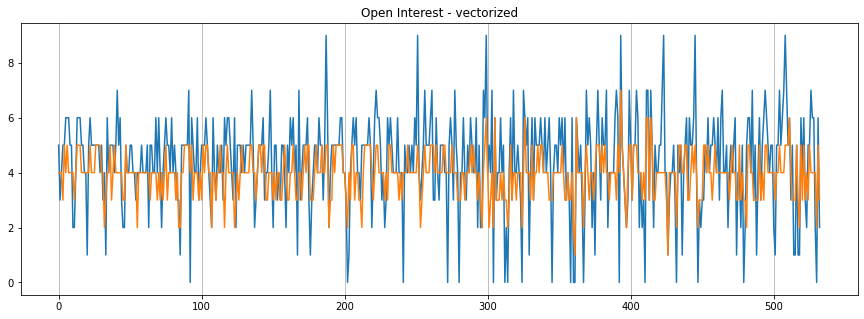

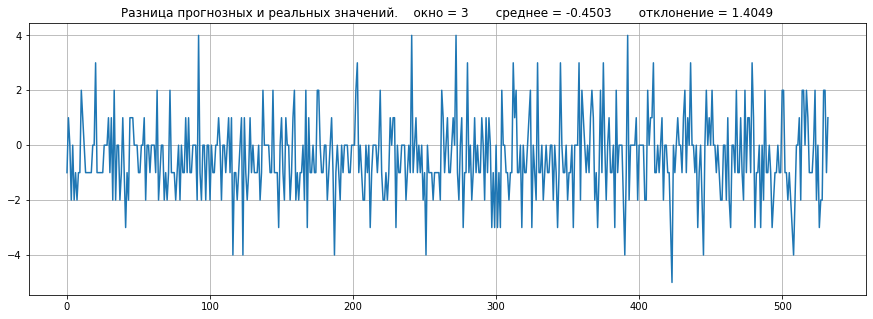

In [15]:
middle = []
middle = aprx-train_y
print("Полное совпадение прогноза и реального результата: {} %".format( str(ef) ) )
plt.figure(figsize=(15,5))
plt.grid(axis = 'x')
plt.title(df_name)
plt.plot(train_y)
plt.plot(aprx)
plt.show()
print()
plt.figure(figsize=(15,5))
plt.grid()
plt.title("Разница прогнозных и реальных значений.    окно = " + str(step) + "       среднее = " + str(round(np.mean(middle),4)) + "       отклонение = " + str(round(np.std(middle),4)))
plt.plot(middle)
plt.show()

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               3100      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 13,301
Trainable params: 13,301
Non-trainable params: 0
_________________________________________________________________
